In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import sqlite3
from matplotlib.ticker import FuncFormatter, MaxNLocator, AutoMinorLocator
import warnings
warnings.filterwarnings("ignore", message="axes.color_cycle is deprecated")
%matplotlib inline

from wordcloud import WordCloud
import matplotlib.animation as animation

In [15]:
plt.get_backend()

'module://ipykernel.pylab.backend_inline'

In [2]:
#Check available tables
con = sqlite3.connect('database.sqlite')
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('NationalNames',), ('StateNames',)]


In [3]:
# helper method to load the data
def retrieve_data(table='NationalNames'):
    assert table in ('NationalNames', 'StateNames')
    cols = ['Name', 'Year', 'Gender', 'Count']
    if table == 'StateNames':
        cols.append('State')
    df = pd.read_sql_query("SELECT {0} from {1}".format(','.join(cols), table), con)
    return df

In [4]:
df = retrieve_data('NationalNames')

In [5]:
def plot_name(raw, name, gender=None):
    name = name.lower().capitalize()
    limit_gender = (df['Gender']==gender) if gender in ['M', 'F'] else (df['Gender']==df['Gender'])
    limit_name = (raw['Name']==name)
    min_date = 1880
    max_date = 2015 # max data plus 1
    data = raw[limit_name&limit_gender]
    data = data[['Year', 'Count']]
    data = data.groupby('Year')
    data = data.sum()
    data = data.reindex(index=range(min_date, max_date))
    data.fillna(0, inplace=True)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ys = list(data.Count)
    xs = list(data.index)
    """
    labels = (list(data.index))
    def format_fn(tick_val, tick_pos):
        if int(tick_val) in xs:
            return labels[int(tick_val)]
        else:
            return ''
    ax.xaxis.set_major_formatter(FuncFormatter(format_fn))
    """
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_ylabel('Count', color='darkblue')
    ax.set_xlabel('Year', color='darkblue')
    major_ticks = np.arange(min_date, max_date, 20)   
    ax.set_xticks(major_ticks) 
    ax.plot(xs, ys, label=name)
    ax.legend(loc='upper right', fontsize='x-large')
    minor_locator = AutoMinorLocator(4)
    ax.xaxis.set_minor_locator(minor_locator)
    ax.tick_params(which='minor', length=2, color='black')
    plt.show()

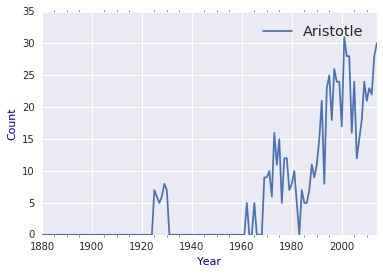

In [6]:
plot_name(df, 'Aristotle')

<IPython.core.display.Javascript object>


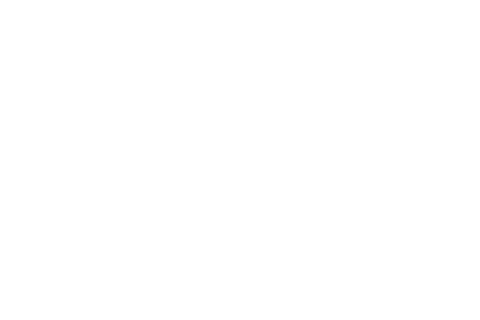

Line2D(_line0)


<IPython.core.display.Javascript object>


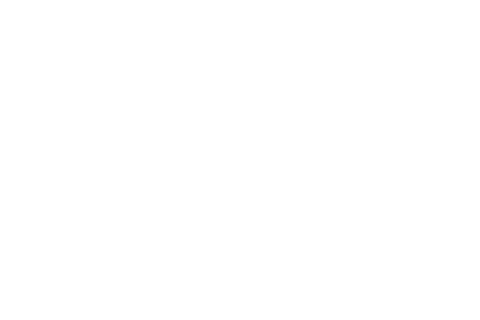

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))
print (line)

def animate(i):
    line.set_ydata(np.sin(x + i/10.0))  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
                              interval=25, blit=True)
plt.show()

In [2]:
from tempfile import NamedTemporaryFile
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import numpy as np

IMG_TAG = """<img src="data:image/gif;base64,{0}" alt="some_text">"""

def anim_to_gif(anim):
    data="0"
    with NamedTemporaryFile(suffix='.gif') as f:
        anim.save(f.name, writer='imagemagick', fps=10);
        data = open(f.name, "rb").read()
        data = data.encode("base64")
    return IMG_TAG.format(data)

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_gif(anim))

fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(7, 6.5)

ax = plt.axes(xlim=(0, 10), ylim=(0, 10))
patch = plt.Circle((5, -5), 0.75, fc='y')
patch2 = plt.Circle((5, -5), 0.1, fc='b')
c= np.array([5,5])


def init():
    patch.center = (5, 5)
    ax.add_patch(patch)
    ax.add_patch(patch2)
    return patch,

def animate(i):
    x = 5 + 3 * np.sin(np.radians(i))
    y = 5 + 3 * np.cos(np.radians(i))
    patch.center = (x, y)
    patch2.center = (x-0.6*np.sin(np.radians(5*i)),y+0.6*np.cos(np.radians(5*i)))
    return patch2,

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, frames=[5.8*x for x in range(62)], interval=1, blit=True)
display_animation(anim)

/home/ec2-user/.pyenv/versions/3.5.1/lib/python3.5/site-packages/matplotlib/animation.py:782: UserWarning: MovieWriter imagemagick unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


ValueError: Cannot save animation: no writers are available. Please install mencoder or ffmpeg to save animations.

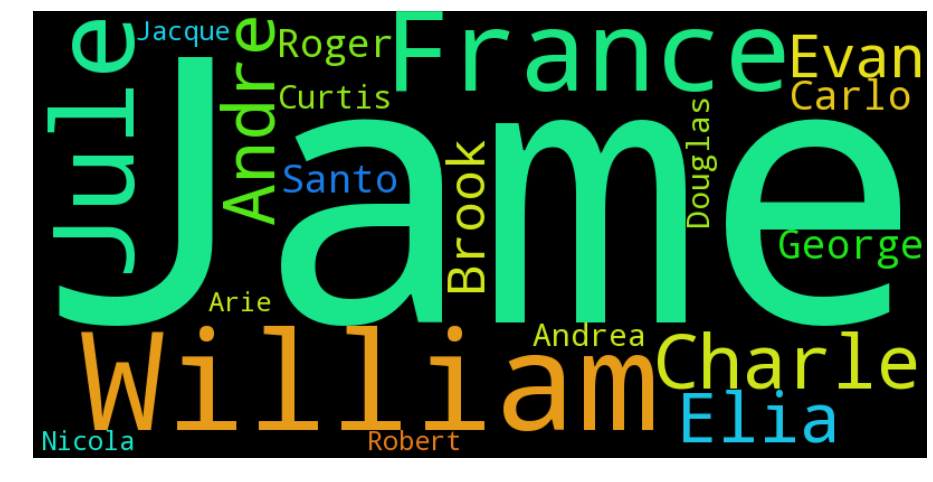

In [11]:
years = df.Year.unique()
def get_wordcloud(year):
    year_df = df[df.Year == year]
    year_names = df.Name
    wordcloud = WordCloud(width=800, height=400, max_words=20).generate(" ".join(year_names))
    return wordcloud.to_image()

year = years[0]
fig = plt.figure(figsize=(16, 16))
im = plt.imshow(get_wordcloud(year), cmap=plt.get_cmap('jet'))
ax = plt.axis("off")

def updatefig(*args):
    global year
    year = 0 if year == len(years) - 1 else year+1
    im.set_data(get_wordcloud(year))
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=1000, blit=True, repeat=False)
plt.show()


In [59]:
rate_asha, rate_kelly, initial_asha = tuple([int(i) for i in '3 5 1'.split()])
def determine_day(rate_asha, rate_kelly, initial_asha):
    if rate_asha >= rate_kelly:
        return -1
    day = 0
    start = initial_asha
    while(start>=0):
        start = start - (rate_kelly - rate_asha)
        day = day + 1
    return day
determine_day(rate_asha, rate_kelly, initial_asha)

1

In [ ]:
def maxDiff(a=[8, 2, 10, 10]):
    max_diff = -1
    max_right = a[-1]
 
    for i in range(len(a)-2, -1, -1):
        if a[i] > max_right:
            max_right = a[i]
        else:
            diff = max_right - a[i]
            if (diff > max_diff):
                max_diff = diff
    return max_diff

/home/ec2-user/.pyenv/versions/3.5.1/lib/python3.5/site-packages/matplotlib/animation.py:782: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


ValueError: Cannot save animation: no writers are available. Please install mencoder or ffmpeg to save animations.

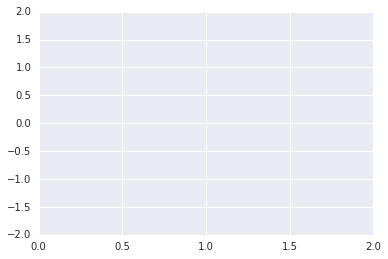

In [12]:
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()